# Time Series forecasting with an Exponential Smoothing Model

In [1]:
# Imports
import sys
import os
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from darts import TimeSeries
from darts.models import ExponentialSmoothing

# To import the main.py file
sys.path.append('../')
from python_files import main

# Getting all the data
confirmed_global, deaths_global, recovered_global, country_cases = main.collect_data()

In [2]:
# Setting up plotly to work offline and in jupyter notebooks
pyo.init_notebook_mode(connected = True)
%matplotlib inline

In [3]:
pd.options.display.float_format = '{:.5f}'.format

In [4]:
india_cases = main.get_new_cases('India')
india_cases

,date,cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
188,7/28/20,1531669
189,7/29/20,1581963
190,7/30/20,1634746
191,7/31/20,1695988


In [5]:
split_ratio = 0.9
train_size = int(split_ratio * len(india_cases))
train_df, test_df = india_cases.iloc[:train_size, :], india_cases.iloc[train_size:, :]

In [6]:
train, test = TimeSeries.from_dataframe(train_df, 'date', 'cases'), TimeSeries.from_dataframe(test_df, 'date', 'cases')

In [7]:
time_series = TimeSeries.from_dataframe(india_cases, 'date', 'cases')

In [8]:
train

                 0
date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
...            ...
2020-07-08  767296
2020-07-09  793802
2020-07-10  820916
2020-07-11  849522
2020-07-12  878254

[173 rows x 1 columns]
Freq: D

In [9]:
test

                  0
date               
2020-07-13   906752
2020-07-14   936181
2020-07-15   968857
2020-07-16  1003832
2020-07-17  1039084
2020-07-18  1077781
2020-07-19  1118206
2020-07-20  1155338
2020-07-21  1193078
2020-07-22  1238798
2020-07-23  1288108
2020-07-24  1337024
2020-07-25  1385635
2020-07-26  1435616
2020-07-27  1480073
2020-07-28  1531669
2020-07-29  1581963
2020-07-30  1634746
2020-07-31  1695988
2020-08-01  1750723
Freq: D

In [13]:
model = ExponentialSmoothing(trend = 'additive', seasonal = 'add')
model.fit(train)
prediction = model.predict(len(test) + 30)

In [14]:
pred_df = TimeSeries.pd_dataframe(prediction)
pred_df['date'] = pred_df.index
pred_df.index = [x for x in range(len(pred_df))]
pred_df.rename(columns = {0: 'cases'}, inplace = True)
pred_df['date'] = pd.to_datetime(pred_df['date'],unit='ms')
pred_df

,cases,date
0,906986.05401,2020-07-13
1,935718.41800,2020-07-14
2,964450.82735,2020-07-15
3,993183.79586,2020-07-16
4,1021915.76153,2020-07-17
5,1050648.08517,2020-07-18
6,1079380.94017,2020-07-19
7,1108111.54781,2020-07-20
8,1136843.91415,2020-07-21
9,1165575.48586,2020-07-22


Text(0, 0.5, 'Cases')

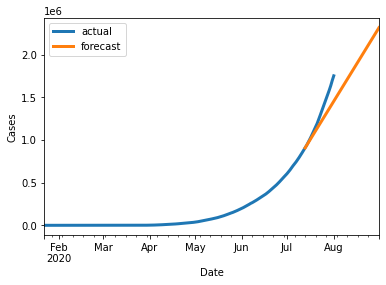

In [15]:
import matplotlib.pyplot as plt

time_series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cases')

# fig = go.Figure()
# fig.add_scatter(x = india_cases['date'].values, y = india_cases['cases'].values, mode = 'lines')
# fig.add_scatter(x = pred_df['date'].values, y = pred_df['cases'].values, mode = 'lines')
# fig.show()